**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
#Load 2 class data
two_class_data = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
#Head of Dataset
two_class_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
#Tail of Dataset
two_class_data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
#Check for missing values
two_class_data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
#Look at the unique values of class values
two_class_data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
#Look at the distribution of class values and other attributes
two_class_data.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [8]:
#Get the datatype information about the dataset
two_class_data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

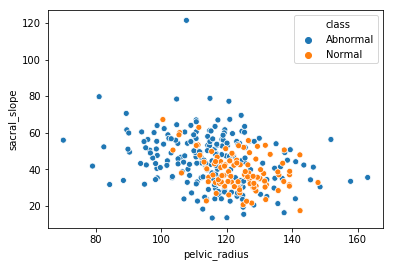

In [9]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization
sns.scatterplot(two_class_data['pelvic_radius'],two_class_data['sacral_slope'],two_class_data['class'])

# Encode the Class variable to integer.

In [10]:
#Get the Label encoder
le = preprocessing.LabelEncoder()

#Convert class column to encoded values of class of 2 Class Dataset
two_class_data['class']=le.fit_transform(two_class_data['class'])

#View transformed Data
print("After transforming Categorical data to numerical data, we have:")
two_class_data

After transforming Categorical data to numerical data, we have:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [11]:
#Create the X(Feature-set)
X = two_class_data.iloc[:,0:-1]

In [12]:
#Create the Y(Target-set)
y = two_class_data.iloc[:,-1]

# Normalize your Data (X) to get values between 0 to 1.

In [13]:
#Normalize Data (X)
for i in X.columns:
    X[i] = (X[i] - min(X[i])) / (max(X[i]) - min(X[i]))

In [14]:
#View normalized Data (X)
print("After normalization, Data is:")
X

After normalization, Data is:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


# Split the dat as train and test with a ratio of 70:30.

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [16]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [18]:
#Calculating the performance score
print("Performance score of our classification on test dataset is", knn.score(X_test, y_test))

Performance score of our classification on test dataset is 0.7849462365591398


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [19]:
maximum = 0
max_k = 0
score = []
for k in range(1, 40, 2):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    #Calculate the performance score
    score.append(knn.score(X_test, y_test))

    #Print the Misclassification error
    print("Score with k =", k, " is:", score[-1])
    
    if score[-1] > maximum:
        maximum = score[-1]
        max_k = k

#Print the model with maximum score
print("Model with maximum Score of", maximum, "is with k = ", max_k, "neighbours.")

#Delete temporary variables
del maximum, max_k, k, knn

Score with k = 1  is: 0.8494623655913979
Score with k = 3  is: 0.7849462365591398
Score with k = 5  is: 0.8064516129032258
Score with k = 7  is: 0.8172043010752689
Score with k = 9  is: 0.8279569892473119
Score with k = 11  is: 0.8172043010752689
Score with k = 13  is: 0.8172043010752689
Score with k = 15  is: 0.8064516129032258
Score with k = 17  is: 0.8172043010752689
Score with k = 19  is: 0.8172043010752689
Score with k = 21  is: 0.7956989247311828
Score with k = 23  is: 0.7849462365591398
Score with k = 25  is: 0.7849462365591398
Score with k = 27  is: 0.7741935483870968
Score with k = 29  is: 0.7741935483870968
Score with k = 31  is: 0.8064516129032258
Score with k = 33  is: 0.8172043010752689
Score with k = 35  is: 0.8064516129032258
Score with k = 37  is: 0.7956989247311828
Score with k = 39  is: 0.8172043010752689
Model with maximum Score of 0.8494623655913979 is with k =  1 neighbours.


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [20]:
#Load 3 class data
three_class_data = pd.read_csv("3Classdata.csv")

In [21]:
#Head of Dataset
three_class_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [22]:
#Tail of Dataset
three_class_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [23]:
#Check for missing values
three_class_data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [24]:
#Look at the unique values of class values
three_class_data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [25]:
#Look at the distribution of class values and other attributes
three_class_data.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [26]:
#Get the datatype information about the dataset
three_class_data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

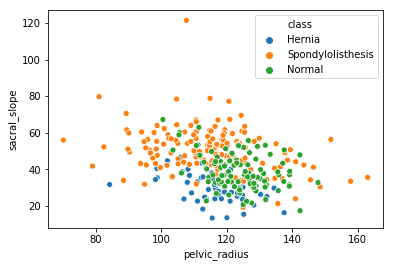

In [27]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization
sns.scatterplot(three_class_data['pelvic_radius'],three_class_data['sacral_slope'],three_class_data['class'])

In [28]:
#Convert class column to encoded values of class of 2 Class Dataset
three_class_data['class']=le.fit_transform(three_class_data['class'])

#View transformed Data
print("After transforming Categorical data to numerical data, we have:")
three_class_data

After transforming Categorical data to numerical data, we have:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [29]:
#Create the X(Feature-set)
X = three_class_data.iloc[:,0:-1]

In [30]:
#Create the Y(Target-set)
y = three_class_data.iloc[:,-1]

In [31]:
#Normalize Data (X)
for i in X.columns:
    X[i] = (X[i] - min(X[i])) / (max(X[i]) - min(X[i]))

In [32]:
#View normalized Data (X)
print("After normalization, Data is:")
X

After normalization, Data is:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [34]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [36]:
#Calculating the performance score
print("Performance score of our classification on test dataset is", knn.score(X_test, y_test))

Performance score of our classification on test dataset is 0.7526881720430108


In [37]:
maximum = 0
max_k = 0
score = []
for k in range(1, 40, 2):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    #Calculate the performance score
    score.append(knn.score(X_test, y_test))

    #Print the Misclassification error
    print("Score with k =", k, " is:", score[-1])
    
    if score[-1] > maximum:
        maximum = score[-1]
        max_k = k

#Print the model with maximum score
print("Model with maximum Score of", maximum, "is with k = ", max_k, "neighbours.")

#Delete temporary variables
del maximum, max_k, k, knn

Score with k = 1  is: 0.7419354838709677
Score with k = 3  is: 0.7204301075268817
Score with k = 5  is: 0.7526881720430108
Score with k = 7  is: 0.7311827956989247
Score with k = 9  is: 0.7956989247311828
Score with k = 11  is: 0.7849462365591398
Score with k = 13  is: 0.8172043010752689
Score with k = 15  is: 0.7741935483870968
Score with k = 17  is: 0.7849462365591398
Score with k = 19  is: 0.7634408602150538
Score with k = 21  is: 0.7741935483870968
Score with k = 23  is: 0.7956989247311828
Score with k = 25  is: 0.7956989247311828
Score with k = 27  is: 0.7849462365591398
Score with k = 29  is: 0.7634408602150538
Score with k = 31  is: 0.7741935483870968
Score with k = 33  is: 0.7741935483870968
Score with k = 35  is: 0.7311827956989247
Score with k = 37  is: 0.7311827956989247
Score with k = 39  is: 0.7311827956989247
Model with maximum Score of 0.8172043010752689 is with k =  13 neighbours.
